<a href="https://colab.research.google.com/github/mchirico/colab/blob/master/devFastAI_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cmd-m-h . for list of hot keys

[Fast AI lession 2](https://course.fast.ai/videos/?lesson=2)




In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

In [0]:

!mkdir -p '/content/gdrive/My Drive/fastai-v3/data/bears'

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [0]:
bs = 64

In [8]:
path = untar_data(URLs.CAMVID)
path.ls()

[PosixPath('/root/.fastai/data/camvid/valid.txt'),
 PosixPath('/root/.fastai/data/camvid/codes.txt'),
 PosixPath('/root/.fastai/data/camvid/images'),
 PosixPath('/root/.fastai/data/camvid/labels')]

In [0]:
path_lbl = path/'labels'
path_img = path/'images'

## Subset classes

In [0]:
# path = Path('./data/camvid-small')

# def get_y_fn(x): return Path(str(x.parent)+'annot')/x.name

# codes = array(['Sky', 'Building', 'Pole', 'Road', 'Sidewalk', 'Tree',
#     'Sign', 'Fence', 'Car', 'Pedestrian', 'Cyclist', 'Void'])

# src = (SegmentationItemList.from_folder(path)
#        .split_by_folder(valid='val')
#        .label_from_func(get_y_fn, classes=codes))

# bs=8
# data = (src.transform(get_transforms(), tfm_y=True)
#         .databunch(bs=bs)
#         .normalize(imagenet_stats))


## Data


In [11]:
fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('/root/.fastai/data/camvid/images/0001TP_008490.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_08145.png'),
 PosixPath('/root/.fastai/data/camvid/images/Seq05VD_f03570.png')]

In [12]:
lbl_names = get_image_files(path_lbl)
lbl_names[:3]

[PosixPath('/root/.fastai/data/camvid/labels/0016E5_05490_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/Seq05VD_f02490_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0016E5_07800_P.png')]

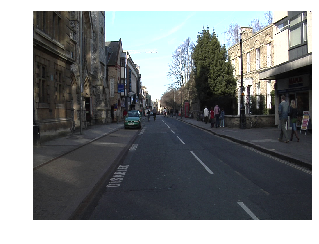

In [14]:
img_f = fnames[10]
img = open_image(img_f)
img.show(figsize=(5,5))

In [0]:
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

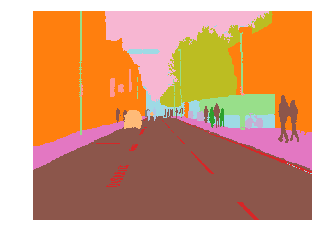

In [20]:
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5), alpha=1)

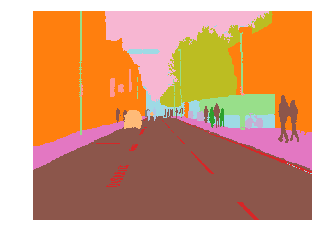

In [10]:
fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('/root/.fastai/data/camvid/images/0001TP_008490.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_08145.png'),
 PosixPath('/root/.fastai/data/camvid/images/Seq05VD_f03570.png')]

In [0]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [0]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/leonberger_128.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_187.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_20.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_38.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_63.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

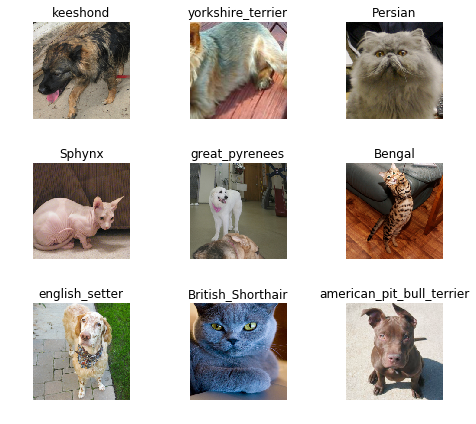

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 99405587.53it/s]


In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.400481,0.345021,0.115697,01:26
1,0.562523,0.247192,0.083897,01:27
2,0.358174,0.219808,0.079161,01:28
3,0.262572,0.204958,0.071042,01:28


In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

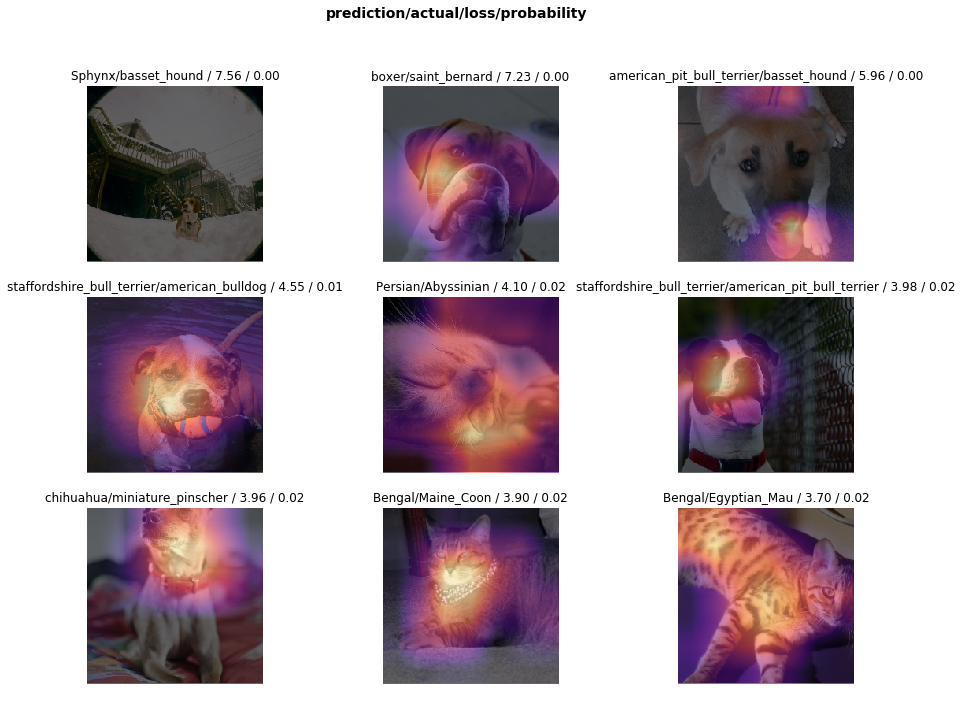

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
doc(interp.plot_top_losses)

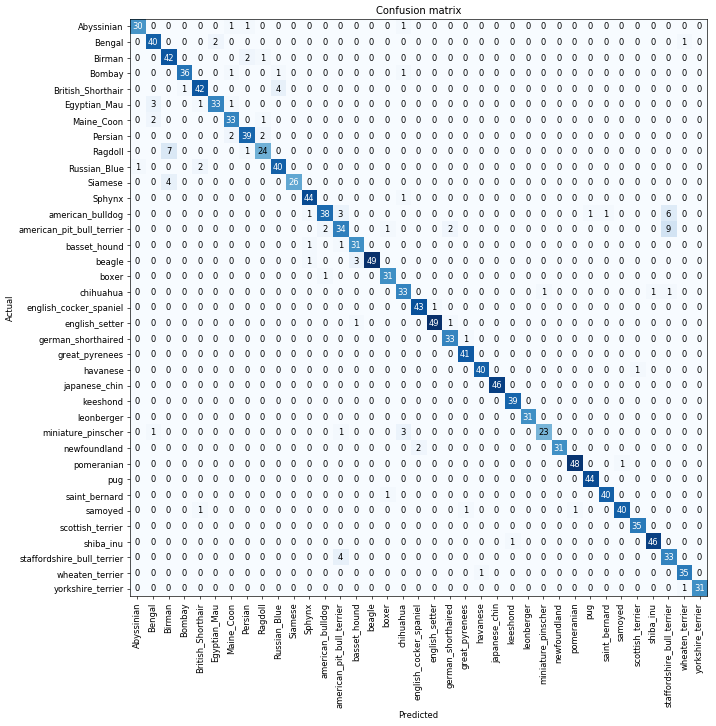

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
doc(interp.most_confused)

Unfreezing, find-tuning

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.532930,0.377652,0.117727,01:26


In [0]:
# Above... wow, we broke model
# so go back to stage-1
learn.load('stage-1');


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


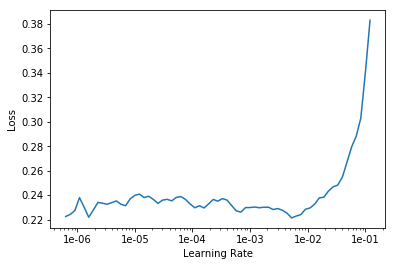

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.232498,0.196153,0.062923,01:24
1,0.213768,0.191951,0.058863,01:23


In [0]:
path.ls()

[PosixPath('/content/data/oxford-iiit-pet/images'),
 PosixPath('/content/data/oxford-iiit-pet/annotations')]

In [0]:
doc(interp.plot_top_losses)


In [0]:
doc(Path)





To grab code
---



```
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```




In [0]:
!mkdir -p '/content/gdrive/My Drive/fastai-v3/data/rodents'

In [0]:
path = Path('/content/gdrive/My Drive/fastai-v3/data/rodents')
dest = path/folder
#dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/rodents/rats'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/rodents/squirrels'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/rodents/mice')]

In [0]:
path = Path('/content/gdrive/My Drive/fastai-v3/data/rodents')
folder = 'mice'
file = 'urls_mice.csv'

imgs = 'imgs'
dest = path/imgs/folder
dest.mkdir(parents=True, exist_ok=True)

download_images(path/folder/file, dest, max_pics=200)

In [0]:
path = Path('/content/gdrive/My Drive/fastai-v3/data/rodents')
folder = 'rats'
file = 'urls_rats.csv'

imgs = 'imgs'
dest = path/imgs/folder
dest.mkdir(parents=True, exist_ok=True)

download_images(path/folder/file, dest, max_pics=200)

In [0]:
path = Path('/content/gdrive/My Drive/fastai-v3/data/rodents')
folder = 'squirrels'
file = 'urls_squirrels.csv'

imgs = 'imgs'
dest = path/imgs/folder
dest.mkdir(parents=True, exist_ok=True)

download_images(path/folder/file, dest, max_pics=200)

In [0]:
classes = ['mice','rats','squirrels']
path = Path('/content/gdrive/My Drive/fastai-v3/data/rodents')
imgs = 'imgs'

for c in classes:
  print(c)
  
  dest = path/imgs/c
  verify_images(dest, delete=True, max_workers=8)

View Images

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


In [0]:
data.classes

['mice', 'rats', 'squirrels']

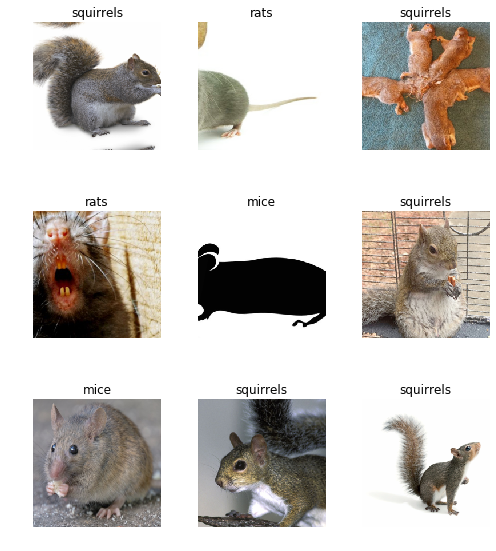

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['mice', 'rats', 'squirrels'], 3, 232, 57)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.191452,0.908400,0.438596,00:12
1,0.920461,0.490676,0.210526,00:12
2,0.732969,0.382888,0.157895,00:12
3,0.643850,0.350530,0.140351,00:12


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


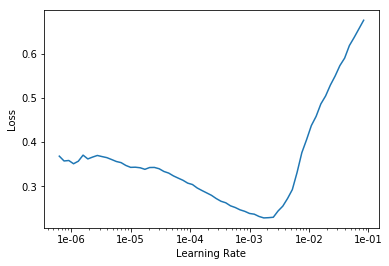

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2,max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.364664,0.377128,0.175439,00:12
1,0.317764,0.361009,0.175439,00:12


In [0]:
learn.save("stage-2")

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

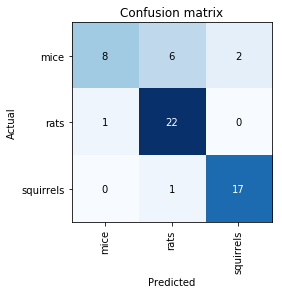

In [0]:
interp.plot_confusion_matrix()

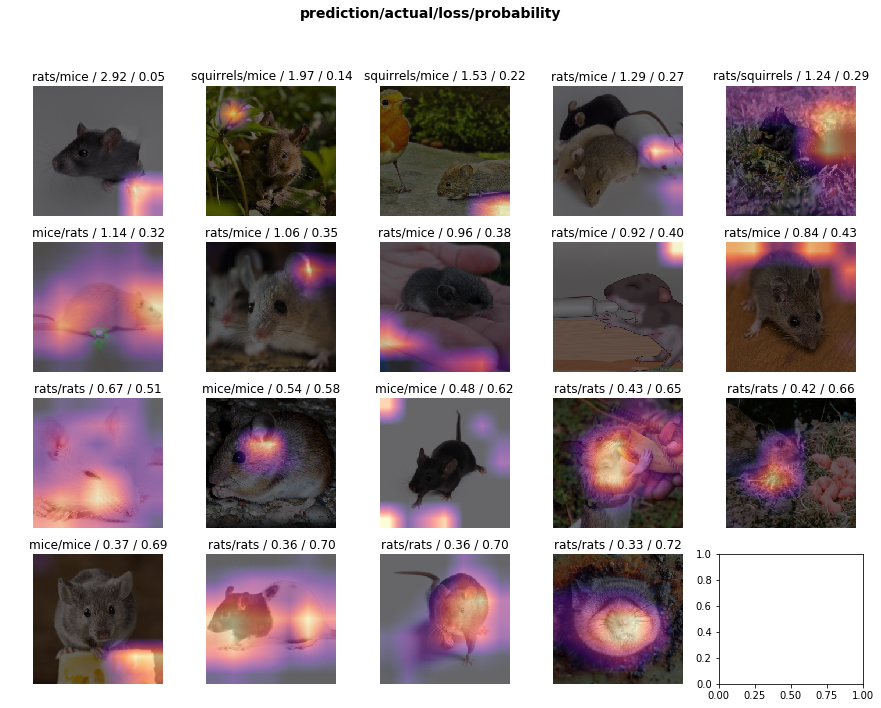

In [0]:
interp.plot_top_losses(19, figsize=(15,11))

In [0]:
from fastai.widgets import *

losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

In [0]:
top_loss_paths

ImageList (57 items)
Image (3, 411, 666),Image (3, 400, 400),Image (3, 720, 1280),Image (3, 1485, 2600),Image (3, 1680, 3200)
Path: /content/gdrive/My Drive/fastai-v3/data/rodents